## From Second Quantization to Equation-of-Motion Coupled-Cluster using sympy

### Table of contents 
1. [Introduction](#Introduction)
2. [Second Quantization](#Second-Quantization)
3. [Wicks theorem](#Wicks-theorem)
4. [One body operator](#One-body-operator)
5. [Two body operator](#Two-body-operator)
6. [Baker-Campbell-Hauersdorf](#Baker-Campbell-Hauersdorf)
7. [Hartree-Fock](#Hartree-Fock)
8. [Coupled-Cluster](#Coupled-Cluster)
9. [Equation-of-motion Coupled-Cluster](#Equation-of-motion-Coupled-Cluster)

### Introduction
We will have hands on tutorial for the derivation of amplitudes with one and two particle density matrix and transition density matrix for equation of motion coupled-cluster theory. We will build our symbolic library using [sympy](https://www.sympy.org/en/index.html).
One can easily extend this to any operator.

### Second Quantization

### Equation-of-motion Coupled-Cluster
Defining opeartors for all flavor of EOM 

In [158]:
from sympy import *                                                             
from sympy.physics.secondquant import F, Fd,AntiSymmetricTensor,NO
from fractions import Fraction                                                  


def R0(expr):

 if   expr == "IP":
  R0 = 0
  return R0
 elif expr == "DIP":
  R0 = 0
  return R0
 elif expr == "EA":
  R0 = 0
  return R0
 elif expr == "DEA":
  R0 = 0
  return R0
 elif expr == "EE":
  R0 = Fraction(1, 1)*AntiSymmetricTensor('R0',(),())
  return R0
 elif expr == "CCSD":
  R0 = 1
  return R0


def R1(expr):                                                           

 i1,i2,i3 = symbols('i1,i2,i3' ,below_fermi=True, cls=Dummy)                          
 a1,a2,a3 = symbols('a1,a2,i3' ,above_fermi=True, cls=Dummy)

 if   expr == "IP":                                                             
  R1 = Fraction(1, 1)*AntiSymmetricTensor('R',(),(i1,))*(F(i1))                                                            
  return R1                                                                     
 elif expr == "DIP":                                                            
  R1 = Fraction(1, 2)*AntiSymmetricTensor('R',(),(i1,i2))*F(i2)*F(i1)          
  return R1
 elif expr == "EA":
  R1 = Fraction(1, 1)*AntiSymmetricTensor('R',(a1,),())*Fd(a1)
  return R1
 elif expr == "DEA":
  R1 = Fraction(1, 2)*AntiSymmetricTensor('R',(a1,a2),())*NO(Fd(a1)*Fd(a2))
  return R1                                                                   
 elif expr == "EE":
  R1 = Fraction(1, 1)*AntiSymmetricTensor('R',(a1,),(i1,))*Fd(a1)*F(i1)
  return R1
 elif expr == "CCSD":
  R1 = 0
  return R1
                                                                                
def R2(expr):                                                           
 i1,i2,i3,i4,i5 = symbols('i1,i2,i3,i4,i5' ,below_fermi=True, cls=Dummy)
 a1,a2,a3,a4,a5 = symbols('a1,a2,a3,a4,a5' ,above_fermi=True, cls=Dummy)                          
 if   expr == "IP":                                                             
  R2 = Fraction(1, 2)*AntiSymmetricTensor('R',(a1,),(i2,i3))*Fd(a1)*F(i3)*F(i2)                  
  return R2                                                                     
 elif expr == "DIP":                                                            
  R2 = Fraction(1, 6)*AntiSymmetricTensor('R',(a1,),(i3,i4,i5))*Fd(a1)*F(i5)*F(i4)*F(i3)          
  return R2
 elif expr == "EA":
  R2 = Fraction(1, 2)*AntiSymmetricTensor('R',(a2,a3),(i1,))*Fd(a2)*Fd(a3)*F(i1)
  return R2
 elif expr == "DEA":
  R2 = Fraction(1, 6)*AntiSymmetricTensor('R',(a3,a4,a5),(i1,))*NO(Fd(a3)*Fd(a4)*Fd(a5)*F(i1))
  return R2                                                                   
 elif expr == "EE":
  R2 = Fraction(1, 4)*AntiSymmetricTensor('R',(a2,a3),(i2,i3))*Fd(a2)*Fd(a3)*F(i3)*F(i2)
  return R2
 elif expr == "CCSD":
  R2 = 0
  return R2


def L0(expr):

 if   expr == "IP":
  L0 = 0
  return L0
 elif expr == "DIP":
  L0 = 0
  return L0
 elif expr == "EA":
  L0 = 0
  return L0
 elif expr == "DEA":
  L0 = 0
  return L0
 elif expr == "EE":
  L0 = Fraction(1, 1)*AntiSymmetricTensor('L0',(),())
  return L0
 elif expr == "CCSD":
  L0 = 1
  return L0


def L1(expr):                                                           
 j1,j2,j3 = symbols('j1,j2,j3' ,below_fermi=True, cls=Dummy)                          
 b1,b2,b3 = symbols('b1,b2,b3' ,above_fermi=True, cls=Dummy)

 if   expr == "IP":                                                             
  L1 = Fraction(1, 1)*AntiSymmetricTensor('L',(j1,),())*Fd(j1)
  return L1                                                                     
 elif expr == "DIP":                                                            
  L1 = Fraction(1, 2)*AntiSymmetricTensor('L',(j1,j2),())*Fd(j1)*Fd(j2)          
  return L1
 elif expr == "EA":
  L1 = Fraction(1, 1)*AntiSymmetricTensor('L',(),(b1,))*F(b1)
  return L1
 elif expr == "DEA":
  L1 = Fraction(1, 2)*AntiSymmetricTensor('L',(),(b1,b2))*F(b2)*F(b1)
  return L1                                                                   
 elif expr == "EE":
  L1 = Fraction(1, 1)*AntiSymmetricTensor('L',(j1,),(b1,))*Fd(j1)*F(b1)
  return L1
 elif expr == "CCSD":
  L1 = Fraction(1, 1)*AntiSymmetricTensor('L',(j1,),(b1,))*Fd(j1)*F(b1)
  return L1
                                                                                
def L2(expr):                                                           
 j1,j2,j3,j4,j5 = symbols('j1,j2,j3,j4,j5' ,below_fermi=True, cls=Dummy)
 b1,b2,b3,b4,b5 = symbols('b1,b2,b3,b4,b5' ,above_fermi=True, cls=Dummy)                          
 if   expr == "IP":                                                             
  L2 = Fraction(1, 2)*AntiSymmetricTensor('L',(j2,j3),(b1,))*Fd(j2)*Fd(j3)*F(b1)                  
  return L2                                                                     
 elif expr == "DIP":                                                            
  L2 = Fraction(1, 6)*AntiSymmetricTensor('L',(j3,j4,j5),(b1,))*Fd(j3)*Fd(j4)*Fd(j5)*F(b1)          
  return L2
 elif expr == "EA":
  L2 = Fraction(1, 2)*AntiSymmetricTensor('L',(j1,),(b2,b3))*Fd(j1)*F(b3)*F(b2)
  return L2
 elif expr == "DEA":
  L2 = Fraction(1, 6)*AntiSymmetricTensor('L',(j1,),(b3,b4,b5))*Fd(j1)*F(b5)*F(b4)*F(b3)
  return L2                                                                   
 elif expr == "EE":
  L2 = Fraction(1, 4)*AntiSymmetricTensor('L',(j2,j3),(b2,b3))*Fd(j2)*Fd(j3)*F(b3)*F(b2)
  return L2
 elif expr == "CCSD":
  L2 = Fraction(1, 4)*AntiSymmetricTensor('L',(j2,j3),(b2,b3))*Fd(j2)*Fd(j3)*F(b3)*F(b2)
  return L2


In [159]:
from sympy import *                                                             
from sympy.physics.secondquant import F, Fd,Commutator,AntiSymmetricTensor      
from sympy.physics.quantum import Commutator, Dagger, Operator                  
from fractions import Fraction                                                  
                                                                                
def level(main,expr):                                                           
 #setup T                                                                        
 k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12 = symbols('k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12' , below_fermi=True, cls=Dummy)
 d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12 = symbols('d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12' , above_fermi=True, cls=Dummy)
                                                                                
 TA1 = AntiSymmetricTensor('T',(d1,),(k1,))*Fd(d1)*F(k1)                       
 TA2 = Fraction(1, 4)*AntiSymmetricTensor('T',(d2,d3),(k2,k3))*Fd(d2)*Fd(d3)*F(k3)*F(k2)
 TA  = TA1+TA2                                                                  
                                                                                
 TB1 = AntiSymmetricTensor('T',(d4,),(k4,))*Fd(d4)*F(k4)                       
 TB2 = Fraction(1, 4)*AntiSymmetricTensor('T',(d5,d6),(k5,k6))*Fd(d5)*Fd(d6)*F(k6)*F(k5)
 TB  = TB1+TB2                                                                  
                                                                                
 TC1 = AntiSymmetricTensor('T',(d7,),(k7,))*Fd(d7)*F(k7)                       
 TC2 = Fraction(1, 4)*AntiSymmetricTensor('T',(d8,d9),(k8,k9))*Fd(d8)*Fd(d9)*F(k9)*F(k8)
 TC  = TC1+TC2                                                                  
                                                                                
 TD1 = AntiSymmetricTensor('T',(d10,),(k10,))*Fd(d10)*F(k10)                   
 TD2 = Fraction(1, 4)*AntiSymmetricTensor('T',(d11,d12),(k11,k12))*Fd(d11)*Fd(d12)*F(k11)*F(k12)
 TD = TD1+TD2                                                                   
                                                                                
 # BCH expansion                                                                
 if expr == "SD":                                                               
  BCH_expansion = main + Commutator(main,TA) + Fraction(1, 2)*Commutator(Commutator(main,TA),TB) + \
                                Fraction(1, 6)*Commutator(Commutator(Commutator(main,TA),TB),TC) + \
                                Fraction(1, 24)*Commutator(Commutator(Commutator(Commutator(main,TA),TB),TC),TD)
  return BCH_expansion

In [156]:
from sympy import *                                                             
from sympy.physics.secondquant import F, Fd, wicks, Commutator,evaluate_deltas,AntiSymmetricTensor                  
from sympy.physics.quantum import Commutator, Dagger, Operator
from fractions import Fraction
from sympy.physics.secondquant import simplify_index_permutations
from sympy.physics.secondquant import PermutationOperator
from sympy.physics.secondquant import substitute_dummies
from IPython.display import Latex

def OPTDM(L1,R1,L2,R2,flavor1,flavor2):       
    
    print("Computing Dyson OPTDM")

    i = symbols('i' , below_fermi=True)
    a = symbols('a' , above_fermi=True)
 
    index_rule = {'below':  'jklmn','above':  'bcde'}

    print("g_i^R -> start")
    oo = Fd(i)
    cc = level(oo,"SD")
    g_oo = evaluate_deltas(wicks(L2*cc*R1 , keep_only_fully_contracted=True))
    g_oo = substitute_dummies(g_oo,new_indices=True, pretty_indices=index_rule)
    print("g_i^R -> done")

    print("g_a^R -> start")
    ov = Fd(a)
    cc = level(ov,"SD")
    g_ov = evaluate_deltas(wicks(L2*cc*R1 , keep_only_fully_contracted=True))
    index_rule = {'below':  'jklmn','above':  'bcdef'}
    g_ov = substitute_dummies(g_ov,new_indices=True, pretty_indices=index_rule)
    print("g_a^R -> done")

    print("g_i^L -> start")
    vo = F(i)
    cc = level(vo,"SD")
    g_vo = evaluate_deltas(wicks(L1*cc*R2 , keep_only_fully_contracted=True))
    index_rule = {'below':  'jklmn','above':  'bcdef'}
    g_vo = substitute_dummies(g_vo,new_indices=True, pretty_indices=index_rule)
    print("g_i^L -> done")

    print("g_a^L -> start")
    vv = F(a)
    cc = level(vv,"SD")
    g_vv = evaluate_deltas(wicks(L1*cc*R2 , keep_only_fully_contracted=True))
    index_rule = {'below':  'ijklm','above':  'cdefg'}
    g_vv = substitute_dummies(g_vv,new_indices=True, pretty_indices=index_rule)
    print("g_a^L -> done")
    
    return g_oo, g_ov, g_vo, g_vv

Computing Dyson OPTDM
g_i^R -> start
g_i^R -> done
g_a^R -> start
g_a^R -> done
g_i^L -> start
g_i^L -> done
g_a^L -> start
g_a^L -> done


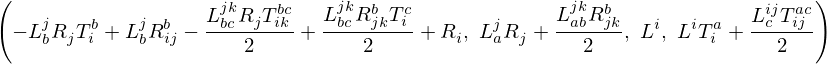

In [160]:
flavor1 = "IP"                                                                 
R0_f1 = R0(flavor1)                                                    
R1_f1 = R1(flavor1)                                                    
R2_f1 = R2(flavor1)                                                    
R_f1  = R0_f1 + R1_f1 + R2_f1                                                 
                                                                                
L0_f1 = L0(flavor1)                                                    
L1_f1 = L1(flavor1)                                                    
L2_f1 = L2(flavor1)                                                    
L_f1  = L0_f1 + L1_f1 + L2_f1                                                                                                      
                                                                                
flavor2 = "CCSD"                                                                
R0_f2 = R0(flavor2)                                                    
R1_f2 = R1(flavor2)                                                    
R2_f2 = R2(flavor2)                                                    
R_f2  = R0_f2 + R1_f2 + R1_f2                                                   
                                                                                
L0_f2 = L0(flavor2)                                                    
L1_f2 = L1(flavor2)                                                    
L2_f2 = L2(flavor2)                                                    
L_f2  = L0_f2 + L1_f2 + L2_f2                                                
                                                                                
OPTDM(L_f1,R_f1,L_f2,R_f2,flavor1,flavor2)
